In [1]:
"""
some remarks:

1) in GT, visible part of the mask is in green, while the occluded is in yellow.
4) how are the occluded and visible parts of the mask combined? intensity levels , multiplication..etc? visualize
from python script with matplotlib.
2) lables format has been corrected in python script to int32
3) grouping script is a neccessity

minutes meetings are tedious, must start ASAP.

"""

'\nsome remarks:\n\n1) in GT, visible part of the mask is in green, while the occluded is in yellow.\n4) how are the occluded and visible parts of the mask combined? intensity levels , multiplication..etc? visualize\nfrom python script with matplotlib.\n2) lables format has been corrected in python script to int32\n3) grouping script is a neccessity\n\nminutes meetings are tedious, must start ASAP.\n\n'

In [2]:
import numpy as np
import os
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cwd = os.getcwd()  # Get the current working directory (cwd)
dir_contets_list = sorted(os.listdir(cwd))  # Get all the files in that directory ordered alphabetically
print("Files in %r: %s" % (cwd, dir_contets_list))
#print('\n',dir_contets_list)

Files in '/home/student2/PycharmProjects/masterproject/relook/instance_occlsegm/instance_occlsegm_lib/contrib/synthetic2d/datasets/green_ai/notebooks/feb_groundtruth_check': ['.ipynb_checkpoints', '00000000', '00000000.npz', '1532900574142981998.jpg', 'Package_01_synthetic_10_10_im.png', 'Package_01_synthetic_10_10_im.png.npz', 'Package_01_synthetic_10_10_rgb.png.jpg', 'Package_01_synthetic_1_1_im.png', 'Package_01_synthetic_1_1_rgb.png.jpg', 'bboxes.npy', 'compare_greenai_GT.ipynb', 'img.npy', 'labels.npy', 'lbl_cls visualization.ipynb', 'lbl_cls.npy', 'masks.npy', 'temp']


In [4]:
lbl_cls = np.load('lbl_cls.npy')

In [5]:
print(type(lbl_cls))

<class 'numpy.ndarray'>


In [6]:
print(lbl_cls)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


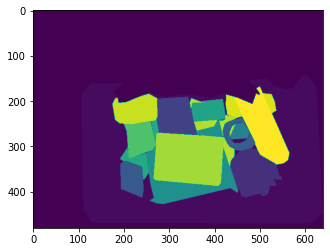

In [7]:
plt.imshow(lbl_cls)

In [8]:
print(lbl_cls.shape)

(480, 640)


In [9]:
print(type(lbl_cls))
print(lbl_cls.dtype)

<class 'numpy.ndarray'>
int32


In [11]:
lbl_cls = np.int8(lbl_cls)
hist = cv2.calcHist([lbl_cls], [0], None, [256], [0, 256])

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/histogram.cpp:1007: error: (-210:Unsupported format or combination of formats)  in function 'calcHist'


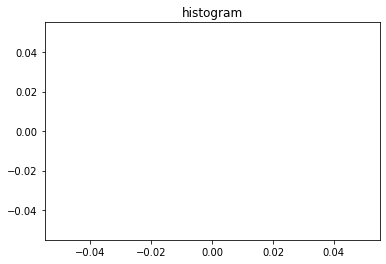

In [21]:
plt.hist(lbl_cls, bins = [10]) 
plt.title("histogram") 
plt.show()

In [ ]:
# GREENAI DATASET MASK
img_greenai_mask = cv2.imread('Package_01_synthetic_1_1_im.png')
img_greenai_mask = cv2.cvtColor(img_greenai_mask, cv2.COLOR_BGR2RGB)
img_greenai_mask = cv2.resize(img_greenai_mask, (640, 480),interpolation=cv2.INTER_NEAREST)
print('maks image shape:', img_greenai_mask.shape)
img_greenai_mask = img_greenai_mask.astype(np.int32)
print('length of mask image shape:', len(img_greenai_mask.shape))
plt.imshow(img_greenai_mask)
plt.title('img_greenai_mask')
plt.show()

In [ ]:
# GREENAI DATASET
img_greenai = cv2.imread('Package_01_synthetic_1_1_rgb.png.jpg')
#img_greenai = cv2.cvtColor(img_greenai, cv2.COLOR_BGR2RGB)
img_greenai = cv2.resize(img_greenai, (640, 480),interpolation=cv2.INTER_NEAREST)
print('RGB image shape:', img_greenai.shape)
print("img_greenai .jpg type: ", img_greenai.dtype)
#img_greenai = img_greenai.astype(np.int32)
print('length of image shape:', len(img_greenai.shape))
plt.imshow(img_greenai[:,:,])
plt.title('img_greenai')
plt.show()

In [ ]:
#show the visible instances from the second B-chanel (blue).
img_greenai_mask_v = img_greenai_mask[:,:,2] #visible instances.
plt.imshow(img_greenai_mask_v)
plt.title('img_greenai_mask_v')
plt.show()
print("We got 4 instances from 2 classes! ")

In [ ]:
#show the occluded mask from the 0 R-chanel (red).
img_greenai_mask_o = img_greenai_mask[:,:,0] #occluded segment from an instance.
plt.imshow(img_greenai_mask_o)
plt.title('img_greenai_mask_o')
plt.show()

In [ ]:
gt_npy_img_array = np.load('img.npy')
plt.imshow(gt_npy_img_array)
print("img.npy type: ", gt_npy_img_array.dtype)

In [ ]:
# GROUND TRUTH
gt_img = cv2.imread('1532900574142981998.jpg')
gt_img = cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB)
print('RGB image shape:', gt_img.shape)
print('length of GT image shape:', len(gt_img.shape))
print("gt_img .jpg type: ", gt_img.dtype)
plt.imshow(gt_img)
plt.title('gt_img')
plt.show()

In [ ]:
gt_npy_img_array = np.load('gt_img.npy')
plt.imshow(gt_npy_img_array)
print("img.npy type: ", gt_npy_img_array.dtype)

In [ ]:
# GREENAI DATASET
img_greenai = cv2.imread('Package_01_synthetic_10_10_rgb.png.jpg')
img_greenai = cv2.cvtColor(img_greenai, cv2.COLOR_BGR2RGB)
img_greenai = cv2.resize(img_greenai, (640, 480),interpolation=cv2.INTER_NEAREST)
print('RGB image shape:', img_greenai.shape)
print("img_greenai .jpg type: ", img_greenai.dtype)
#img_greenai = img_greenai.astype(np.int32)
print('length of image shape:', len(img_greenai.shape))
plt.imshow(img_greenai)
plt.title('img_greenai')
plt.show()

In [ ]:
bboxes_array = np.load('gt_bboxes.npy')
print(bboxes_array.dtype)
print(type(bboxes_array))
print(bboxes_array)

In [ ]:
bboxes_array = np.load('bboxes.npy')
print(bboxes_array.dtype)
print(type(bboxes_array))
print(bboxes_array)

In [ ]:
labels_array = np.load('gt_labels.npy')
print(labels_array.dtype)
print(labels_array)
print(sys.getsizeof(labels_array)) # size in Bytes

In [ ]:
labels_array = np.load('labels.npy')
print(labels_array.dtype)
print(labels_array)
print(sys.getsizeof(labels_array)) # size in Bytes

In [ ]:
gt_masks_array = np.load('gt_masks.npy')
print(gt_masks_array.dtype)
print(type(gt_masks_array))

In [ ]:
masks_array = np.load('masks.npy')
print(masks_array.dtype)
print(type(masks_array))

In [ ]:
plt.imshow(gt_masks_array[0])
print(np.max(gt_masks_array[0]))

In [ ]:
plt.imshow(masks_array[0])
print(np.max(masks_array[0]))

In [ ]:
plt.imshow(masks_array[1])
print(np.max(masks_array[1]))

In [ ]:
plt.imshow(masks_array[2])
print(np.max(masks_array[2]))

In [ ]:
print(gt_masks_array.dtype)
plt.imshow(gt_masks_array[1]) # mask array is of numpy darrays
print(np.min(gt_masks_array[1]))
print(np.max(gt_masks_array[1])) # 0 is background (purple), 1 is visible (green),
# 2 for occluded part (yello). visualize-better on matplotlib in pycharm to double-check. (confirmed).
print(gt_masks_array.shape)
print(gt_masks_array[1].shape)
print(gt_masks_array.dtype)
print(type(gt_masks_array))

In [ ]:
plt.imshow(gt_masks_array[2])
print(np.max(gt_masks_array[2]))

In [ ]:
plt.imshow(gt_masks_array[3])
print(np.max(gt_masks_array[3]))

In [ ]:
plt.imshow(gt_masks_array[4])
print(np.max(gt_masks_array[4]))

In [ ]:
plt.imshow(gt_masks_array[5])
print(np.max(gt_masks_array[5]))

In [ ]:
plt.imshow(gt_masks_array[6])
print(np.max(gt_masks_array[6]))

In [ ]:
def get_visible_labels(img_v):
    hist_v = cv2.calcHist([img_v], [0], None, [256], [0, 256])
    labels_v = []
    [labels_v.append(i) for i, l in enumerate(hist_v) if i != 0 and l != 0]
    labels_v = np.array(labels_v, dtype='int32')  # instead of int64
    return labels_v

In [ ]:
def get_occluded_labels(img_o):
    hist_o = cv2.calcHist([img_o], [0], None, [256], [0, 256])
    labels_o = []
    [labels_o.append(i) for i, l in enumerate(hist_o) if i != 0 and l != 0]
    return labels_o

In [ ]:
def get_repeated_instances(labels_v, labels_o):
    repeated_instances = []
    for i in labels_v:
        if i in labels_o:
            repeated_instances.append(i)
    return repeated_instances

In [ ]:
def create_mask_instances_dic(labels_v, img_v, img_o, repeated_instances):
    # make a dictionary containing pairs of instance label (key) and instance mask (value).
    dic_instances_masks = {}
    for instance_id in labels_v:
        if instance_id in repeated_instances:
            # combine visible and occluded parts of an instance into one mask.
            mask_o = img_o == instance_id
            mask_o = mask_o.astype(np.uint8)
            mask_v = img_v == instance_id
            mask_v = mask_v.astype(np.uint8)
            mask = mask_v + mask_o * 2
            # Applies the mask to the original image, expect binary values: 0,1 only! ((((CHECK!!!))))
            dic_instances_masks[instance_id] = cv2.bitwise_and(img_v, img_v, mask=mask * 255)

        else:
            # create mask for each instance id in the labels list.
            mask = img_v == instance_id  # assign 1 to pixels which have instance_id intensity value, 0 otherwise.
            mask = mask.astype(np.uint8)
            # Applies the mask to the original image, expect binary values: 0,1 only! ((((CHECK!!!))))
            dic_instances_masks[instance_id] = cv2.bitwise_and(img_v, img_v, mask=mask * 255)
    return dic_instances_masks

In [ ]:
def list_of_arrays(dic_instances_masks):
    # create list of arrays (list of instances masks) for every image in the dataset
    masks_list = []
    for key in dic_instances_masks:
        mask_instance = dic_instances_masks[key]
        # masks_list = np.append(masks_list, mask_instance)
        masks_list.append(mask_instance)
    return masks_list

In [ ]:
def get_bboxes(dic_instances_masks):
    # Iterate over the keys to get bboxes:
    bboxes = []
    for key in dic_instances_masks:
        x, y, z, w = cv2.boundingRect(dic_instances_masks[key])
        bbox_list = [x, y, z, w]
        bboxes.append(bbox_list)
    bboxes = np.asarray(bboxes)
    bboxes = np.array(bboxes, dtype='float32')  # instead of unit8
    return bboxes

In [ ]:
img_greenai_mask = cv2.imread('Package_01_synthetic_1_1_im.png')
img_greenai_mask = cv2.cvtColor(img_greenai_mask, cv2.COLOR_BGR2RGB)
img_greenai_mask = cv2.resize(img_greenai_mask, (640, 480), interpolation=cv2.INTER_NEAREST)
# show the visible instances from the second chanel.
img_greenai_mask_v = img_greenai_mask[:, :, 2]  # visible instances, Blue chanel.
# show the occluded mask from the 0 chanel.
img_greenai_mask_o = img_greenai_mask[:, :, 0]  # occluded segment from an instance, Red chanel.

""" create label array"""
labels_o = get_occluded_labels(img_greenai_mask_o)
print(labels_o)
labels_v = get_visible_labels(img_greenai_mask_v)
print(labels_v)

In [ ]:
#class_names = get_class_names(labels_v)
labels = labels_v   # array

In [ ]:
""" create masks array"""
repeated_instances = get_repeated_instances(labels_v, labels_o)
dic_instances_masks = create_mask_instances_dic(labels_v, img_greenai_mask_v, img_greenai_mask_o, repeated_instances)
masks_list = list_of_arrays(dic_instances_masks)
masks = masks_list  # array
masks = np.array(masks, dtype='int32')  # instead of unit8
print(masks.shape)

In [ ]:
""" create bboxes array"""
bboxes = get_bboxes(dic_instances_masks)    # array
print(bboxes)

In [ ]:
plt.imshow(masks[0])
print(np.max(masks[0]))

In [ ]:
plt.imshow(masks[1])
print(np.max(masks[1]))

In [ ]:
plt.imshow(masks[2])
print(np.max(masks[2]))

In [ ]:
plt.imshow(masks[3])
print(np.max(masks[3]))

In [ ]:
# GREENAI DATASET MASK
img_greenai_mask = cv2.imread('Package_01_synthetic_1_1_im.png')
img_greenai_mask = cv2.cvtColor(img_greenai_mask, cv2.COLOR_BGR2RGB)
img_greenai_mask = cv2.resize(img_greenai_mask, (640, 480),interpolation=cv2.INTER_NEAREST)
print('maks image shape:', img_greenai_mask.shape)
img_greenai_mask = img_greenai_mask.astype(np.int32)
print('length of mask image shape:', len(img_greenai_mask.shape))
plt.imshow(img_greenai_mask)
plt.title('img_greenai_mask')
plt.show()